# Data Preprocessing for Regression Data

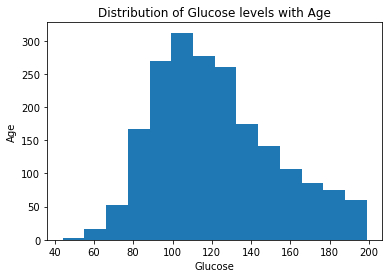

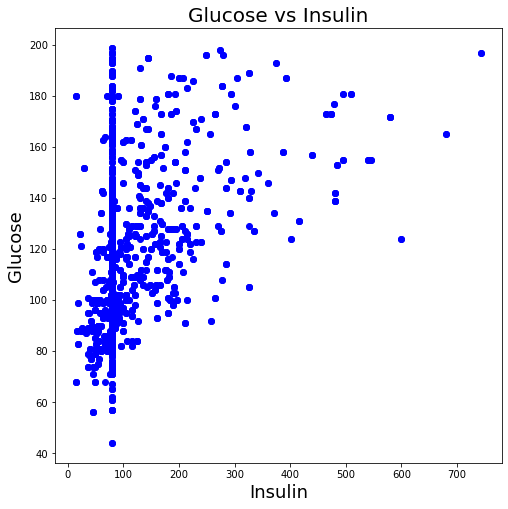

In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
# Matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
# Linear Regression to verify implementation
from sklearn.linear_model import LinearRegression
# Scipy for statistics
import scipy
df = pd.read_csv('diabetes-dataset.csv')
# Change Insulin null (0) values to mean value
df.Insulin = df.Insulin.replace(0, df.Insulin.mean())
# Change Skin Thickness null (0) values to mean value
df.SkinThickness = df.SkinThickness.replace(0, df.SkinThickness.mean())
# Change Glucose null (0) values to mean value
df.Glucose = df.Glucose.replace(0, df.Glucose.mean())
# Change Glucose null (0) values to mean value
df.Glucose = df.Glucose.replace(0, df.Glucose.mean())
# Change Skin Blood Pressure (0) values to mean value
df.BloodPressure = df.BloodPressure.replace(0, df.BloodPressure.mean())
# Change BMI null (0) values to mean value
df.BMI = df.BMI.replace(0, df.BMI.mean())
import matplotlib.pyplot as plt
# Histogram of grades
plt.hist(df['Glucose'], bins = 14)
plt.xlabel('Glucose')
plt.ylabel('Age')
plt.title('Distribution of Glucose levels with Age')
plt.figure(figsize=(8, 8))
plt.plot(df['Insulin'], df['Glucose'], 'bo');
plt.xlabel('Insulin', size = 18); plt.ylabel('Glucose', size = 18); 
plt.title('Glucose vs Insulin', size = 20);

In [3]:
target = df['Glucose']
del df['Glucose']
target.head()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   BloodPressure             2000 non-null   float64
 2   SkinThickness             2000 non-null   float64
 3   Insulin                   2000 non-null   float64
 4   BMI                       2000 non-null   float64
 5   DiabetesPedigreeFunction  2000 non-null   float64
 6   Age                       2000 non-null   int64  
 7   Outcome                   2000 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 125.1 KB


,Pregnancies,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,62.0000,35.000,80.254,33.6,0.127,47,1
1,0,82.0000,31.000,125.000,38.2,0.233,23,0
2,0,69.1455,20.935,80.254,44.2,0.630,31,1
3,0,68.0000,42.000,250.000,42.3,0.365,24,1
4,1,62.0000,41.000,480.000,40.7,0.536,21,0


# Bayesian Ridge Training and Testing

Mean absolute error = 19.78
Mean squared error = 643.272
Median absolute error = 15.55
Explain variance score = 0.33
R2 score = 0.32894


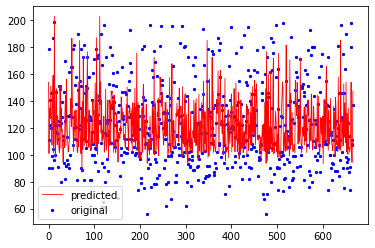

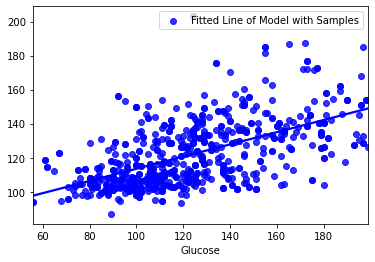

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size = 1/3, random_state=42)
from sklearn.metrics import r2_score
from sklearn.linear_model import BayesianRidge
# df is features and labels are the targets 
# Split by putting 25% in the testing set
model = BayesianRidge()
model.fit(X_train, y_train)
# Model making a prediction on test data
prediction = model.predict(X_test)
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, prediction), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, prediction), 3)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, prediction), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, prediction), 2)) 
print("R2 score =", round(sm.r2_score(y_test, prediction), 5))
#Plotting Bayesian Ridge estimates vs original data
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, prediction, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()
sns.regplot(x=y_test, y=prediction, ci=None, color="b", label="Fitted Line of Model with Samples")
plt.legend()
plt.show() 


# MLP Regressor Training and Testing

Mean absolute error = 20.3
Mean squared error = 685.177
Median absolute error = 15.64
Explain variance score = 0.29
R2 score = 0.28522


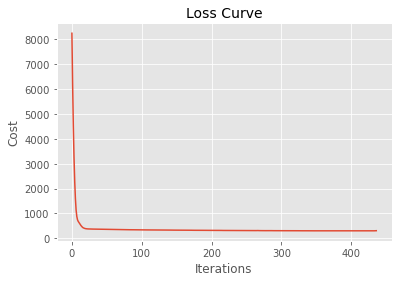

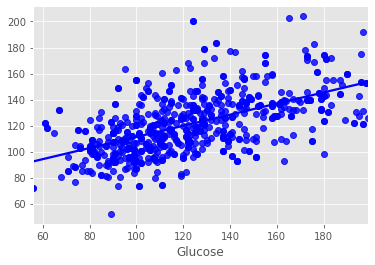

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
regr = MLPRegressor(random_state=42, max_iter=500).fit(X_train, y_train)
prediction2 = regr.predict(X_test)
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, prediction2), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, prediction2), 3)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, prediction2), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, prediction2), 2)) 
print("R2 score =", round(sm.r2_score(y_test, prediction2), 5))
#Plotting loss curve
plt.plot(regr.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()
sns.regplot(x=y_test, y=prediction2, ci=None, color="b", label="Fitted Line of Model with Samples")
plt.show()

# Huber Regressor Training and Testing

Mean absolute error = 19.77
Mean squared error = 656.193
Median absolute error = 15.14
Explain variance score = 0.33
R2 score = 0.315461


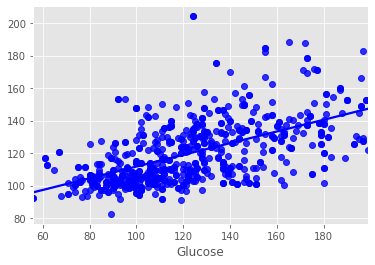

In [ ]:
from sklearn.linear_model import HuberRegressor, LinearRegression
from sklearn.datasets import make_regression
huber = HuberRegressor(max_iter = 500).fit(X_train, y_train)
prediction3 = huber.predict(X_test)
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, prediction3), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, prediction3), 3)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, prediction3), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, prediction3), 2)) 
print("R2 score =", round(sm.r2_score(y_test, prediction3), 6))
#Plotting Linear Model
sns.regplot(x=y_test, y=prediction3, ci=None, color="b", label="Fitted Line of Model with Samples")
plt.show()